In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
# Task 1.

In [3]:
health_data = pd.read_csv("C:/Users/testi/Desktop/excel_files/HealthData.csv", index_col=0)

In [4]:
health_data.head()

,ID,Height,Weight,Syst1,Diast1,Syst2,Diast2,Sex,Mstatus,Income,VaricoseVenes,BMI,Age,Hstatus
1,5513,170,80.5,164,92,156,92,1,1,3,1,27.854671,60,2
2,5521,163,59.6,132,72,126,68,2,1,6,1,22.432158,36,1
3,5590,158,60.0,120,70,120,72,2,1,3,1,24.034610,37,1
4,5646,158,57.4,118,66,120,72,2,1,4,1,22.993110,41,1
5,5658,165,73.5,170,74,166,80,1,2,1,1,26.997245,42,2


In [5]:
df = health_data[["Syst2" ,"Age", "BMI", "Sex", "Mstatus"]].copy()

In [6]:
df.rename(columns={"Syst2": "Syst"}, inplace=True)

In [7]:
df["Sex"] = df["Sex"].astype("category")

In [8]:
df["Mstatus"] = df["Mstatus"].astype("category")

In [9]:
df.dtypes

Syst          int64
Age           int64
BMI         float64
Sex        category
Mstatus    category
dtype: object

In [10]:
df.head()

,Syst,Age,BMI,Sex,Mstatus
1,156,60,27.854671,1,1
2,126,36,22.432158,2,1
3,120,37,24.034610,2,1
4,120,41,22.993110,2,1
5,166,42,26.997245,1,2


In [11]:
# Task 2.

In [12]:
df["Age_C"] = df["Age"] - 16

In [13]:
df["BMI_C"] = df["BMI"] - 18.5

In [14]:
model1 = ols("Syst ~ Age_C + BMI_C + Sex + Mstatus + 0", data=df).fit()

In [15]:
anova = sm.stats.anova_lm(model1, typ=2)

In [16]:
anova

,sum_sq,df,F,PR(>F)
Sex,666160.996813,2.0,1151.750148,4.512203e-181
Mstatus,3403.934811,3.0,3.923458,8.737511e-03
Age_C,19036.733055,1.0,65.826610,4.409135e-15
BMI_C,8660.063862,1.0,29.945403,7.269218e-08
Residual,134764.916213,466.0,NaN,NaN


In [17]:
# The F statistic for every predictor variable is statistically significant. 
# We will therefore inclue all the four predictor variables in our model.

In [18]:
# Task 3.

In [19]:
model1.params

Sex[1]          115.161709
Sex[2]          108.551748
Mstatus[T.2]      7.438908
Mstatus[T.3]      1.964746
Mstatus[T.4]     -1.372093
Age_C             0.624956
BMI_C             1.072390
dtype: float64

In [20]:
# When Sex = 1 (male), the expected systolic blood pressure is 115 mmHg.
# When Sex = 2 (female), the expected systolic blood pressure is 108 mmHg.
# When Age increases by one unit, the exptected raise in systolic blood pressure is 0.62 mmHg
# When BMI increases by one unit, the expected raise in systolic blood pressure is 1.07 mmHg.

In [21]:
# Task 4.

In [22]:
model1_w_int = ols("Syst ~ + BMI_C + Sex + Age_C * Mstatus", data=df).fit()

model1_w_int.params

Intercept             114.148295
Sex[T.2]               -6.378146
Mstatus[T.2]           12.378638
Mstatus[T.3]           -3.876783
Mstatus[T.4]          -14.309055
BMI_C                   1.101810
Age_C                   0.649300
Age_C:Mstatus[T.2]     -0.238373
Age_C:Mstatus[T.3]      0.205786
Age_C:Mstatus[T.4]      0.305988
dtype: float64

In [23]:
anova2 = sm.stats.anova_lm(model1_w_int, typ=2)
anova2

,sum_sq,df,F,PR(>F)
Sex,4584.023529,1.0,15.829534,8.042832e-05
Mstatus,3403.934811,3.0,3.918152,8.804079e-03
BMI_C,9014.962993,1.0,31.130439,4.111331e-08
Age_C,19036.733055,1.0,65.737581,4.647069e-15
Age_C:Mstatus,686.247240,3.0,0.789916,4.999477e-01
Residual,134078.668973,463.0,NaN,NaN


In [24]:
# The low F-statistic value and high p-value indicates that the interaction is not needed.

In [25]:
# Task 5.

In [26]:
df["Single"] = np.where(df["Mstatus"] == 2, "Yes", "No")

df["Single"] = df["Single"].astype("category")

df.dtypes

Syst          int64
Age           int64
BMI         float64
Sex        category
Mstatus    category
Age_C         int64
BMI_C       float64
Single     category
dtype: object

In [27]:
df.head()

,Syst,Age,BMI,Sex,Mstatus,Age_C,BMI_C,Single
1,156,60,27.854671,1,1,44,9.354671,No
2,126,36,22.432158,2,1,20,3.932158,No
3,120,37,24.034610,2,1,21,5.534610,No
4,120,41,22.993110,2,1,25,4.493110,No
5,166,42,26.997245,1,2,26,8.497245,Yes


In [28]:
model2 = ols("Syst ~ Age_C + BMI_C + Sex + Single", data=df).fit()
model2.params

Intercept        115.480662
Sex[T.2]          -6.718836
Single[T.Yes]      7.347353
Age_C              0.617945
BMI_C              1.066953
dtype: float64

In [29]:
model1.aic

4029.8025688964244

In [30]:
model2.aic

4026.292607801427

In [31]:
# Since model2 has a lower AIC value, it is the preferred model.

In [32]:
# Task 6.

In [33]:
model3 = ols("Syst ~ Age_C * Sex + Age_C * Single", data=df).fit()

In [34]:
testing = sm.stats.anova_lm(model3, typ=2)
testing

,sum_sq,df,F,PR(>F)
Sex,5181.045815,1.0,17.148989,4.101883e-05
Single,3026.097209,1.0,10.016222,1.653027e-03
Age_C,34751.426071,1.0,115.025389,3.863602e-24
Age_C:Sex,2258.986137,1.0,7.477125,6.486337e-03
Age_C:Single,118.869419,1.0,0.393452,5.307972e-01
Residual,141089.859164,467.0,NaN,NaN


In [35]:
# The Age_C:Sex interaction can improve the model. It has a low p-value indicating significancy.
# The Age_C:Single interaction can be excluded from the model due to low F-statistic and high p-value.

In [36]:
# Task 7.

In [37]:
print(model1.aic) 
print(model1_w_int.aic)
print(model2.aic)
print(model3.aic)

4029.8025688964244
4033.3878142403855
4026.292607801427
4049.496755193587


In [38]:
# On the basis of AIC alone, model2 seems to be the best model.

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Syst   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     40.97
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           1.91e-29
Time:                        17:48:12   Log-Likelihood:                -2008.1
No. Observations:                 473   AIC:                             4026.
Df Residuals:                     468   BIC:                             4047.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       115.4807      2.392     48.277      0.000     110.780     120.181
Sex[T.2]         -6.7188      1.567     -4.287      0.000      -9.798      -3.639
Single[T.Yes]     7.3474      2.183      3.365      0.001       3.057      11.638
Age_C             0.6179      0.074      8.296      0.000       0.472       0.764
BMI_C             1.0670      0.195      5.466      0.000       0.683       1.450
==============================================================================
Omnibus:                        6.347   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.375
Skew:                           0.260   Prob(JB):                       0.0413
Kurtosis:                       2.771   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Lets evaluate the difference between the actual values vs. predicted values.
# This can be done in two ways.

    # 1. substract the model's fitted values from the true values
    # 2. use the model's .resid-attribute

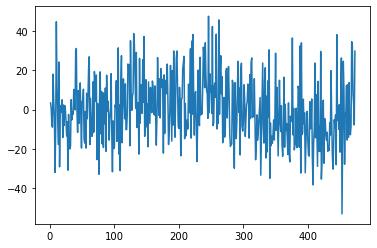

In [41]:
epsilon = df["Syst"] - model2.fittedvalues

plt.plot(epsilon);

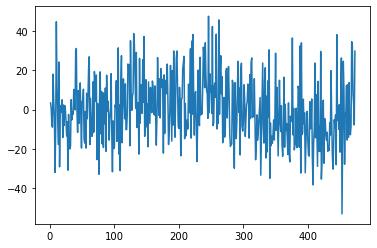

In [42]:
plt.plot(model2.resid);

(100.0, 180.0)

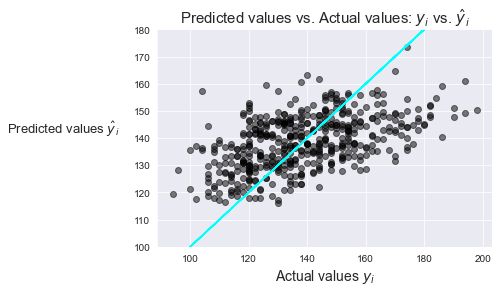

In [43]:
sns.set_style("darkgrid")
plt.plot(df["Syst"], df["Syst"], color="cyan")
plt.scatter(x=df["Syst"], y=model2.fittedvalues, alpha=0.5, color="black")
plt.title("Predicted values vs. Actual values: $y _i$ vs. $\hat y _i$", size=15)
plt.xlabel("Actual values $y _i$", size=14)
plt.ylabel("Predicted values $\hat y _i$", size=13, rotation=0, labelpad=70);
plt.ylim(100, 180)

In [44]:
# The model could use some work.

In [45]:
# Task 8.
# My best model does not have Mstatus predictor. Looks like i have been using the wrong model.
# I'll just build a one that has it.

In [46]:
model_x = ols("Syst ~ Age_C + BMI_C + Sex + Single + Mstatus", data=df).fit()
model_x.params

Intercept        115.161709
Sex[T.2]          -6.609961
Single[T.Yes]      3.719454
Mstatus[T.2]       3.719454
Mstatus[T.3]       1.964746
Mstatus[T.4]      -1.372093
Age_C              0.624956
BMI_C              1.072390
dtype: float64

In [47]:
coeffs = model_x.params

In [48]:
pred1 = (coeffs[0] + coeffs[5]) + (coeffs[6] * 60) + (coeffs[7] * 25)
pred1

# syst = (intercept + Mstatus[T.widowed]) + (Age_C * 60) + (BMI_C * 25)

# Male, widower, age 60, BMI 25.

# juu ei varmana ole. 

178.0967201373631

In [49]:
pred2 = (coeffs[0] + coeffs[1] + coeffs[3]) + (coeffs[6] * 25) + (coeffs[7] * 19)
pred2

# syst = (intercept + Sex[T.2] + Mstatus[T.single]) + (Age_C * 25) + (BMI_C * 19)

148.2705114556992